In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-06.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

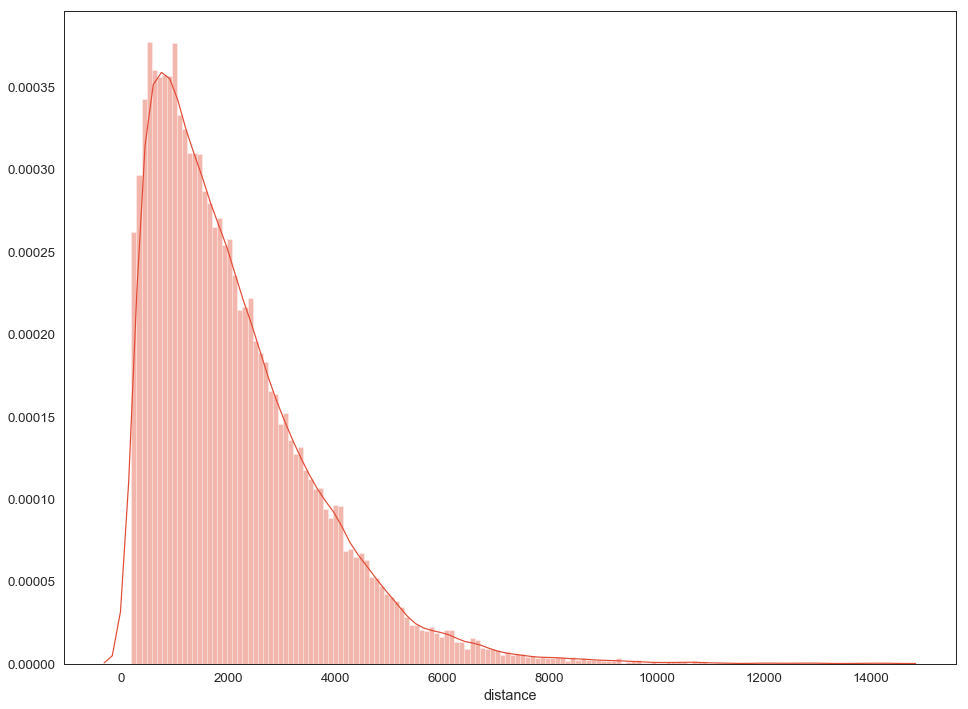

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [5]:
distance = df["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
beta,3537.216705,-1.712262e+06,inf,1.336335e-08
gamma,3535.216720,-1.712272e+06,inf,1.336335e-08
burr,3402.059978,-1.559920e+06,inf,1.781543e-07
norm,5250.517713,-1.511643e+06,inf,4.049812e-07
lognorm,3604.417268,-1.402615e+06,inf,2.584710e-06


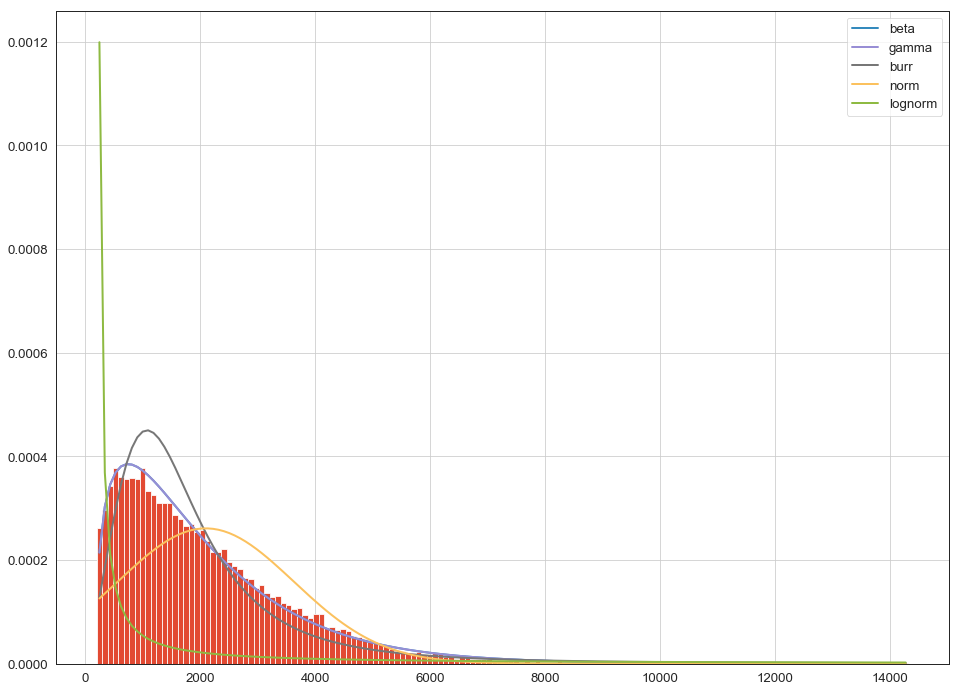

In [6]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=150)
f.fit()
f.summary()

In [7]:
f.get_best(method = 'sumsquare_error')

{'beta': (1.4077173630248447,
  390612436.2272505,
  194.12272111378257,
  528046457691.4419)}

In [8]:
f.get_best(method = 'aic')

{'burr': (2.417676784302201,
  0.948453366212362,
  -8.78481607126935,
  1621.3068197483308)}

In [9]:
f.get_best(method = 'bic')

{'gamma': (1.4077173163010084, 194.1227273551711, 1351.8424033068604)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,3537.216705,-1.712262e+06,inf,1.336335e-08
burr,3402.059978,-1.559920e+06,inf,1.781543e-07
norm,5250.517713,-1.511643e+06,inf,4.049812e-07
alpha,3266.675298,-1.482019e+06,inf,6.700374e-07
bradford,2893.841103,-1.454566e+06,inf,1.068580e-06


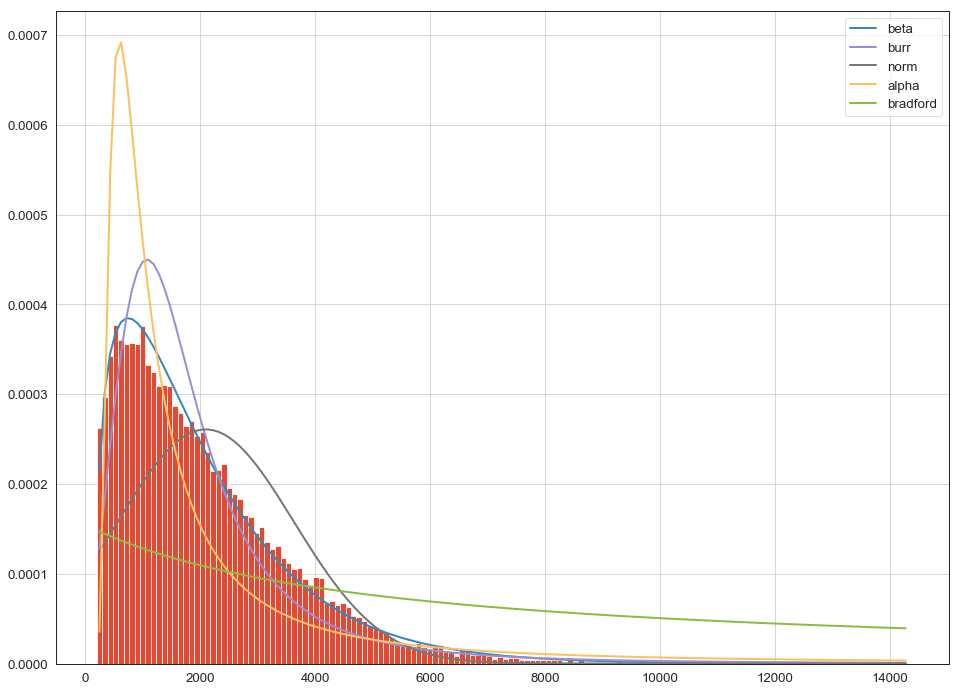

In [10]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi2,3535.216752,-1.712272e+06,inf,1.336335e-08
chi,4057.611401,-1.663715e+06,inf,3.051129e-08
expon,3384.613252,-1.563992e+06,inf,1.663013e-07
dgamma,4010.707287,-1.520130e+06,inf,3.505011e-07
cosine,3103.906135,-1.437118e+06,inf,1.437873e-06


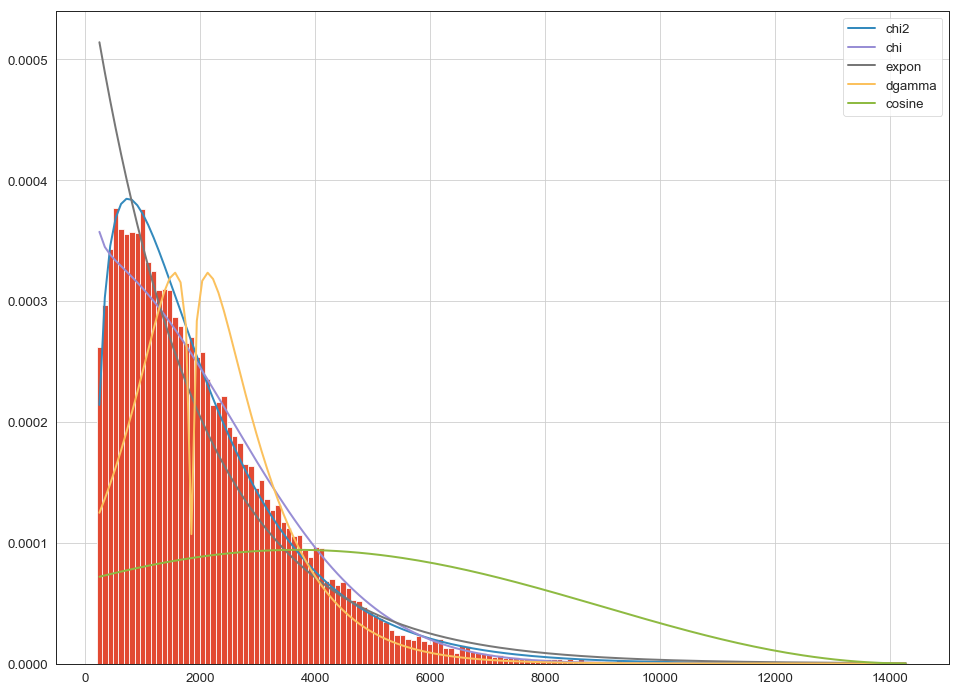

In [11]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,3535.216720,-1.712272e+06,inf,1.336335e-08
f,3517.623000,-1.708906e+06,inf,1.414796e-08
fatiguelife,3467.931115,-1.631598e+06,inf,5.267590e-08
exponnorm,3422.593828,-1.601264e+06,inf,8.822670e-08
fisk,3323.551529,-1.588893e+06,inf,1.088783e-07


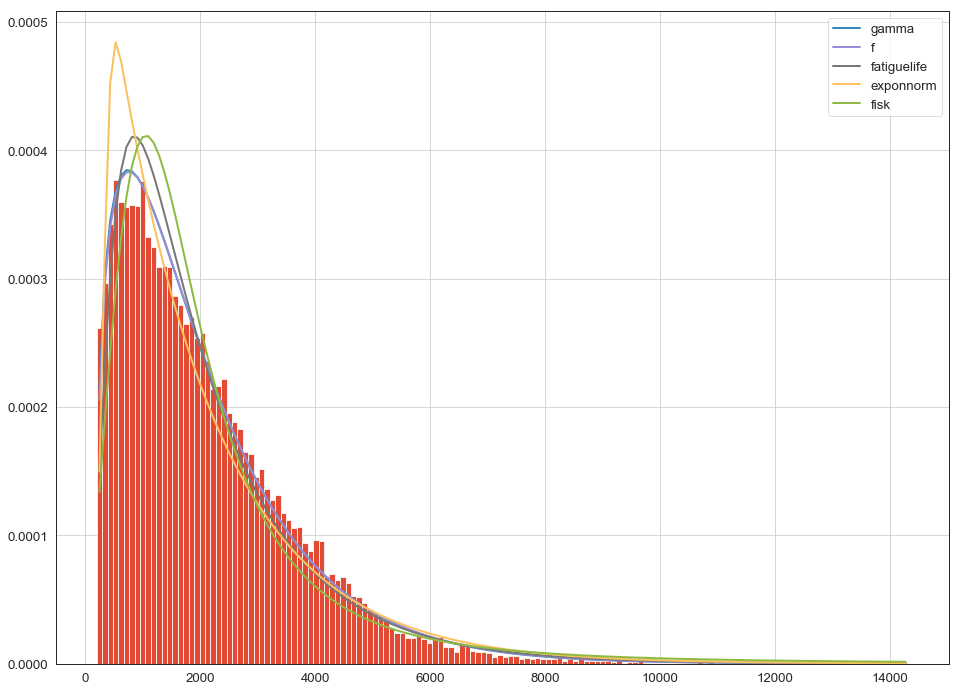

In [12]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
genexpon,3390.680108,-1.563914e+06,inf,1.664264e-07
gengamma,3378.926162,-1.563305e+06,inf,1.681913e-07
loggamma,5198.696957,-1.510724e+06,inf,4.112822e-07
levy,3180.022466,-1.501604e+06,inf,4.803523e-07
lognorm,3604.417268,-1.402615e+06,inf,2.584710e-06


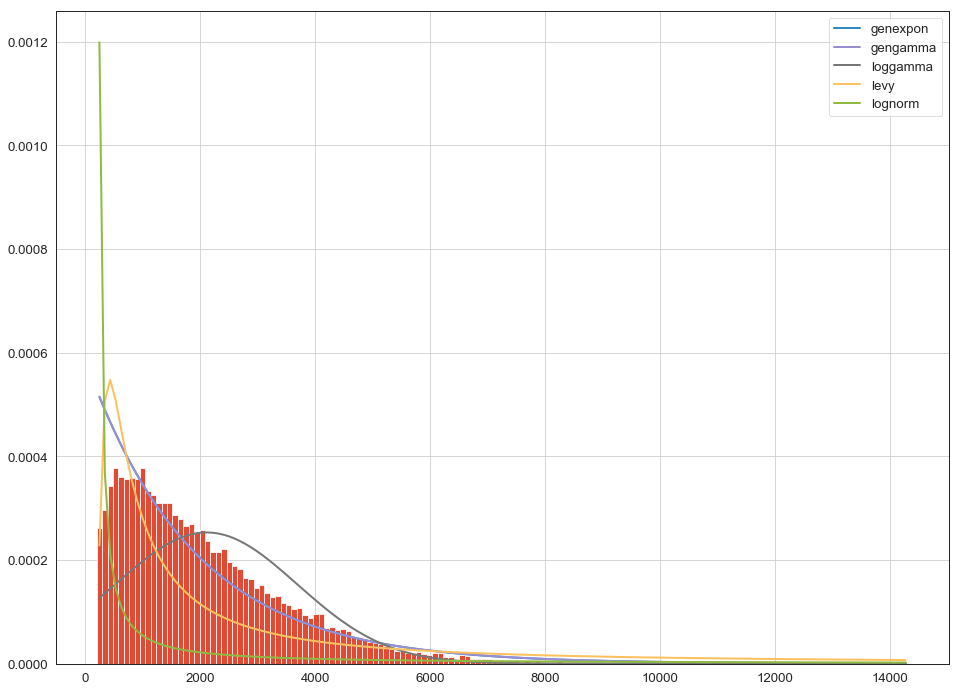

In [13]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,3535.216691,-1.712273e+06,inf,1.336335e-08
logistic,4101.842447,-1.521874e+06,inf,3.403189e-07
t,3899.945455,-1.509443e+06,inf,4.203380e-07
powerlaw,2967.348220,-1.452236e+06,inf,1.111754e-06
pareto,3295.574646,-1.380974e+06,inf,3.734261e-06


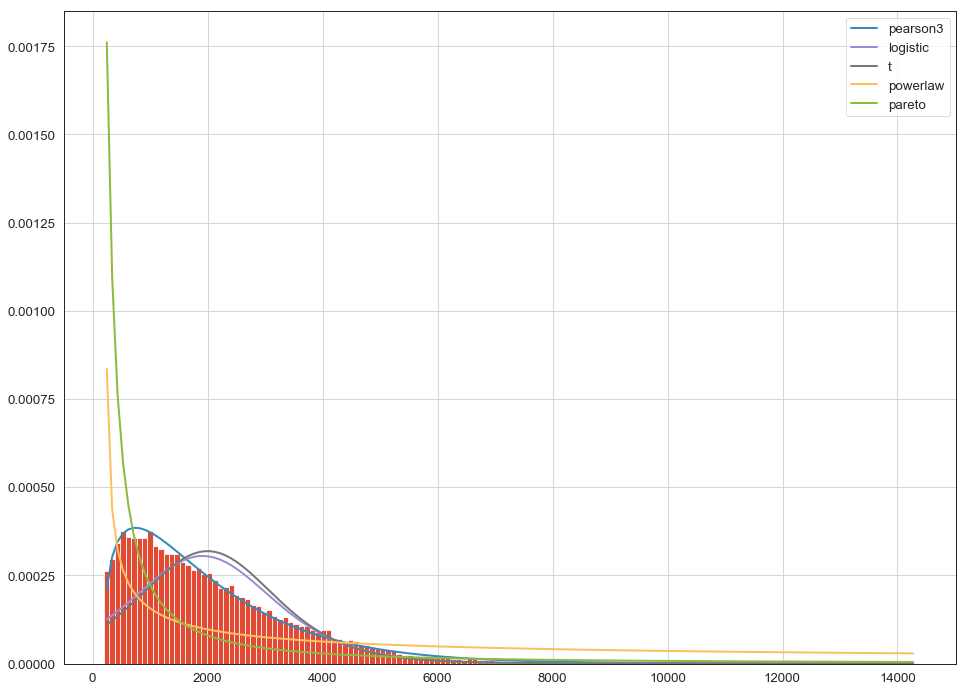

In [14]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins=150)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
beta,3537.216705,-1.712262e+06,inf,1.336335e-08
pearson3,3535.216691,-1.712273e+06,inf,1.336335e-08
gamma,3535.216720,-1.712272e+06,inf,1.336335e-08
f,3517.623000,-1.708906e+06,inf,1.414796e-08
chi,4057.611401,-1.663715e+06,inf,3.051129e-08


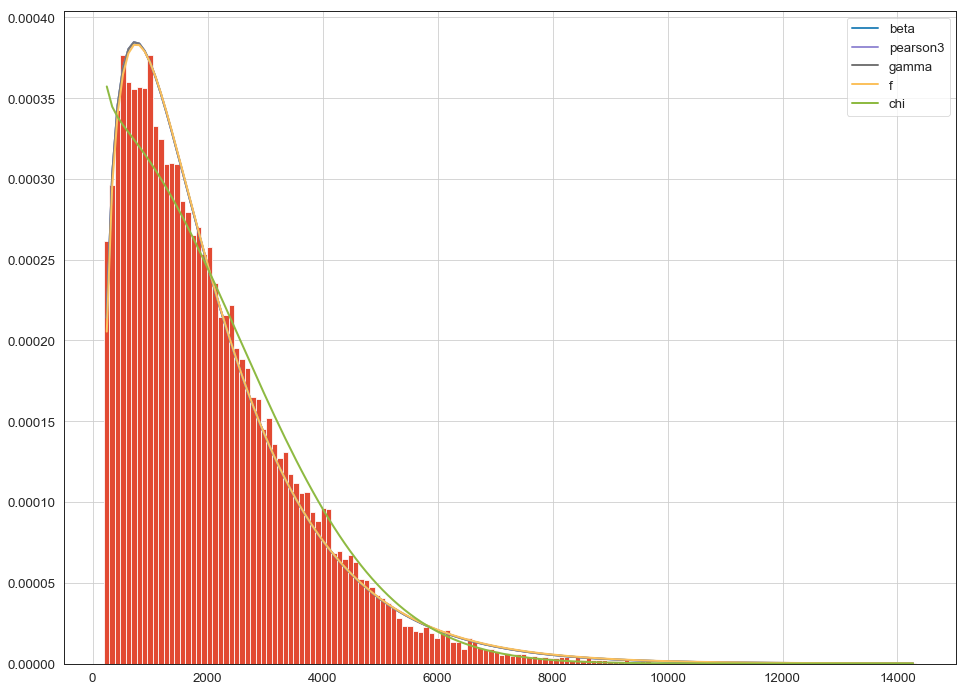

In [15]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma', 'f', 'pearson3'], bins=150)

f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

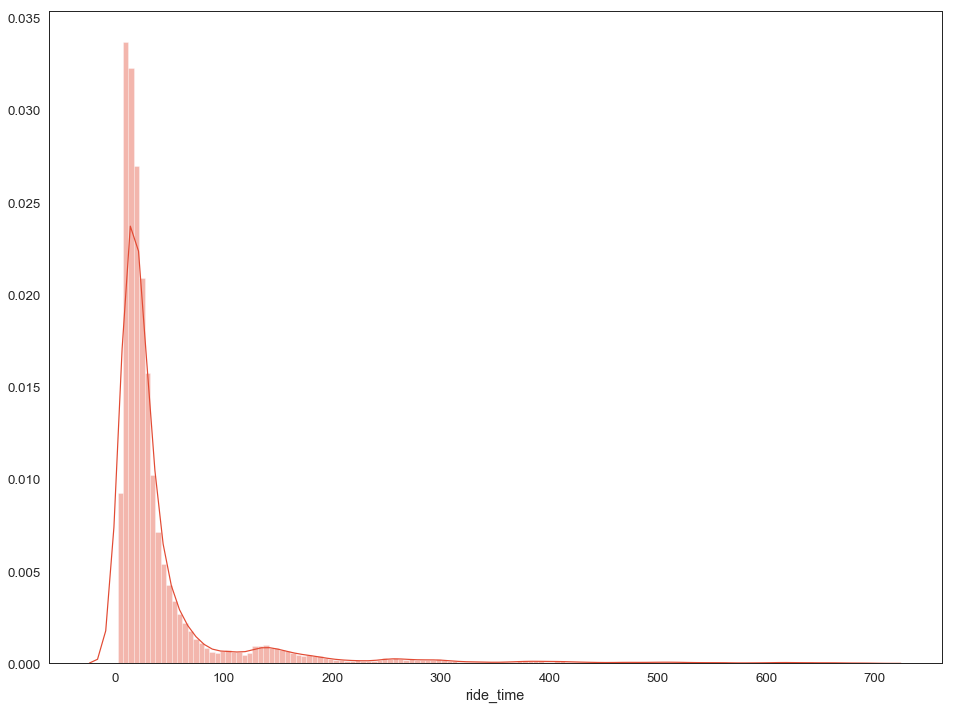

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 140)

In [17]:
rides = df["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
burr,2559.509062,-1.229615e+06,0.023574,0.000049
lognorm,2714.978571,-1.136891e+06,0.078449,0.000237
gamma,3099.488908,-1.049440e+06,0.251799,0.001048
beta,3112.694037,-1.048619e+06,0.255756,0.001062
norm,4529.083361,-9.941123e+05,0.843142,0.002684


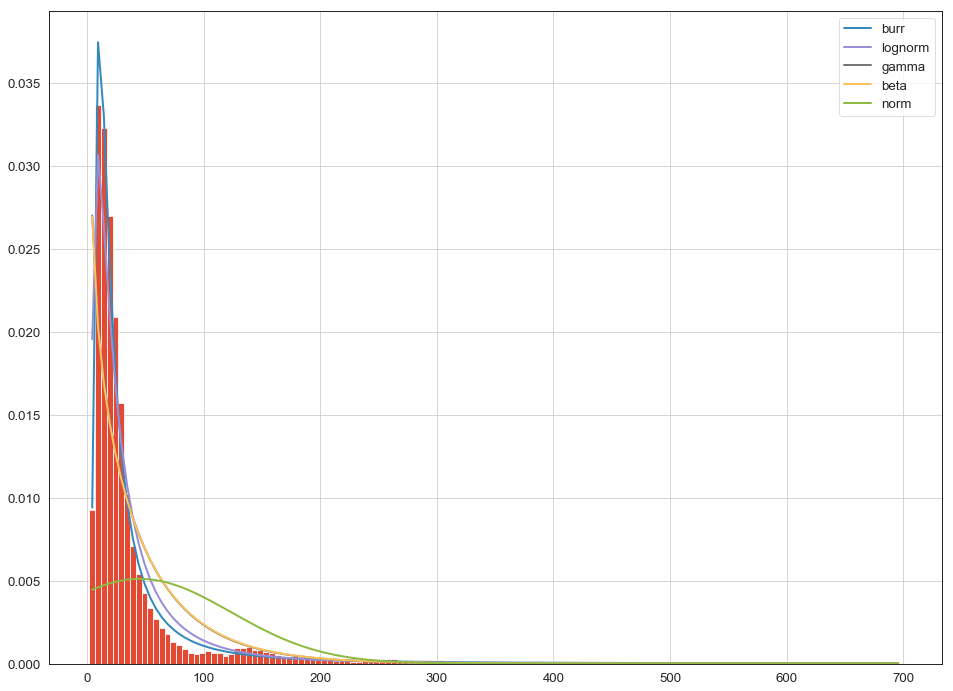

In [18]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins = 140)
f.fit()
f.summary()

In [19]:
f.get_best(method = 'sumsquare_error')

{'burr': (1.3365981343323403,
  13.909993048595702,
  0.24747921054939093,
  2.2391080969670556)}

In [20]:
f.get_best(method = 'aic')

{'burr': (1.3365981343323403,
  13.909993048595702,
  0.24747921054939093,
  2.2391080969670556)}

In [21]:
f.get_best(method = 'bic')

{'burr': (1.3365981343323403,
  13.909993048595702,
  0.24747921054939093,
  2.2391080969670556)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
alpha,2525.810440,-1.237373e+06,0.018739,0.000043
burr,2559.509062,-1.229615e+06,0.023574,0.000049
beta,3112.694037,-1.048619e+06,0.255756,0.001062
norm,4529.083361,-9.941123e+05,0.843142,0.002684
bradford,1859.930887,-9.838186e+05,1.641310,0.003197


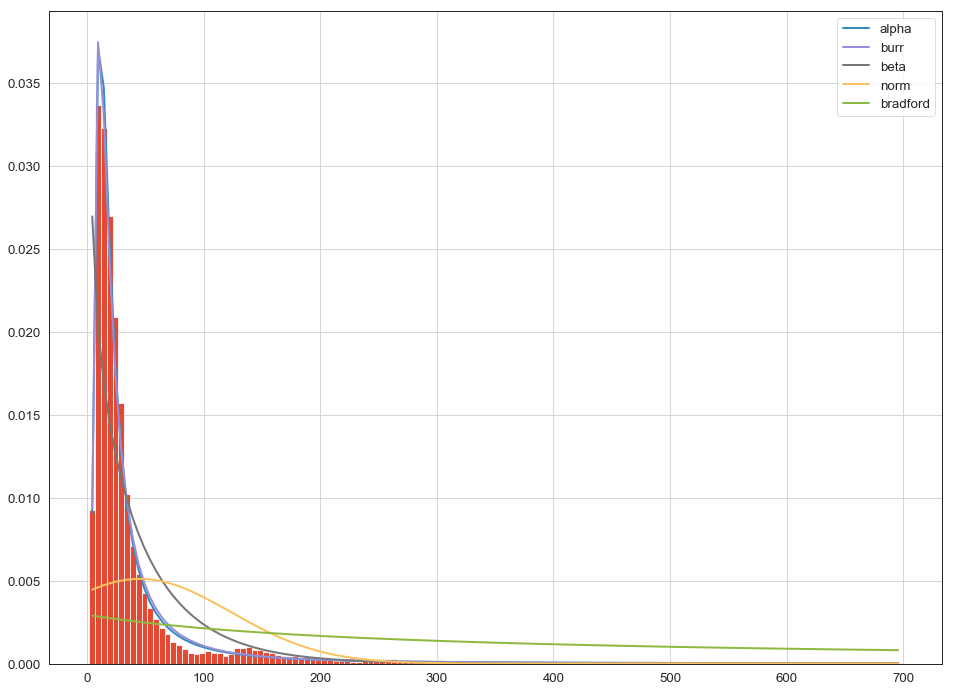

In [22]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
expon,3307.347079,-1.058268e+06,0.245924,0.000902
dgamma,2892.831073,-1.058055e+06,0.105017,0.000905
chi2,3067.835327,-1.048206e+06,0.254279,0.001070
chi,3221.573013,-1.022928e+06,0.431784,0.001644
cosine,2094.303447,-9.788862e+05,1.641973,0.003478


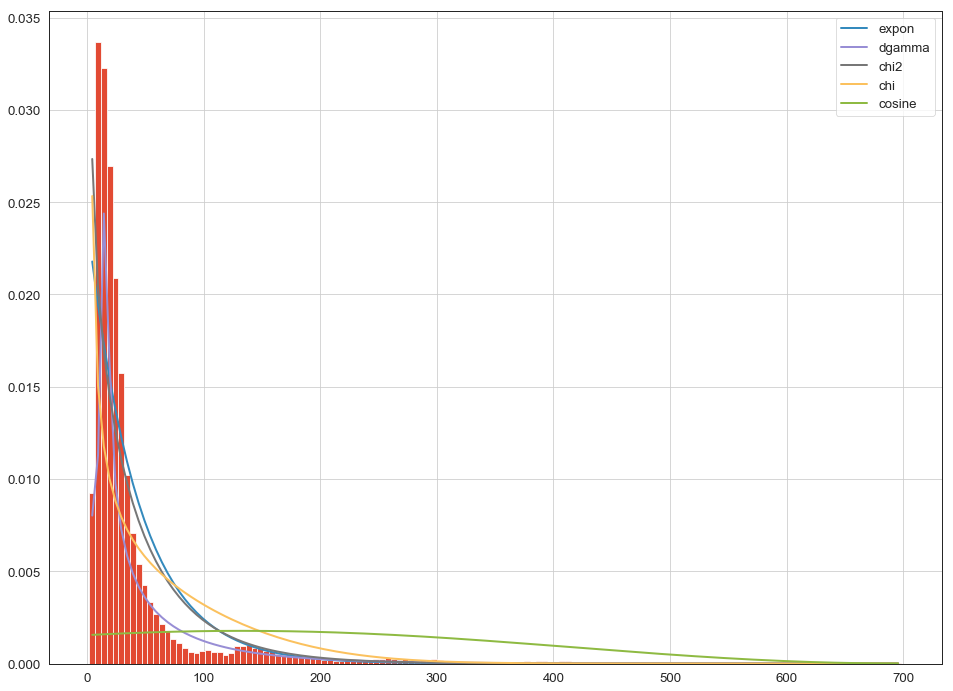

In [23]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
f,2564.851018,-1.224650e+06,0.025748,0.000053
fisk,2679.910382,-1.169720e+06,0.051938,0.000136
fatiguelife,2784.429447,-1.108526e+06,0.128790,0.000384
exponnorm,3422.713071,-1.083621e+06,0.206686,0.000586
gamma,3099.488908,-1.049440e+06,0.251799,0.001048


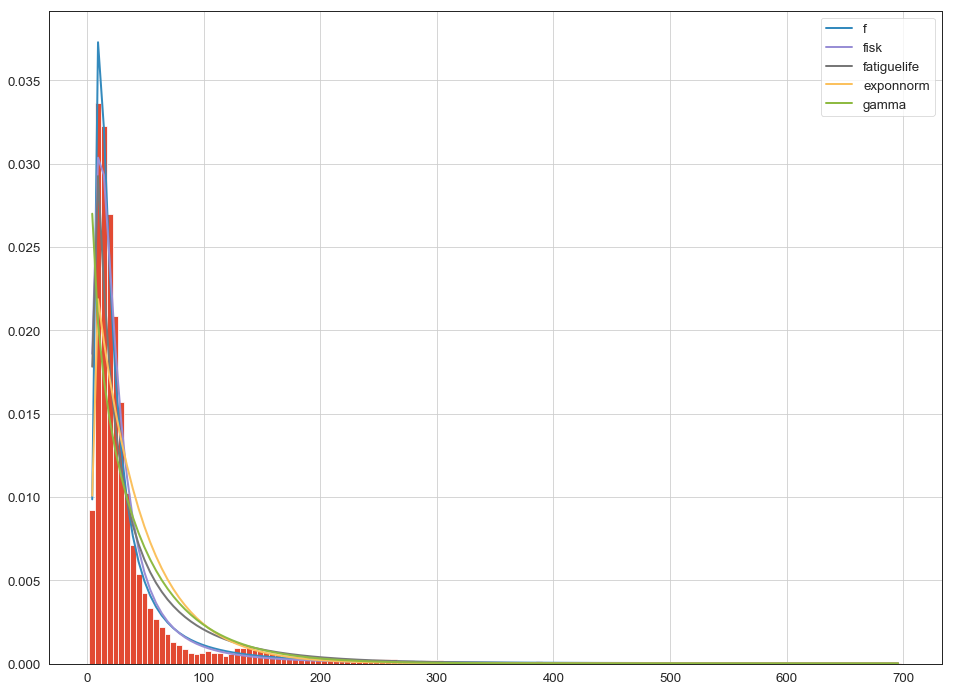

In [24]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,2714.978571,-1.136891e+06,0.078449,0.000237
gengamma,2859.758377,-1.092081e+06,0.130438,0.000507
levy,2244.522869,-1.061572e+06,0.186938,0.000853
genexpon,3313.344365,-1.058235e+06,0.245925,0.000902
loggamma,4199.062081,-9.927802e+05,0.866222,0.002745


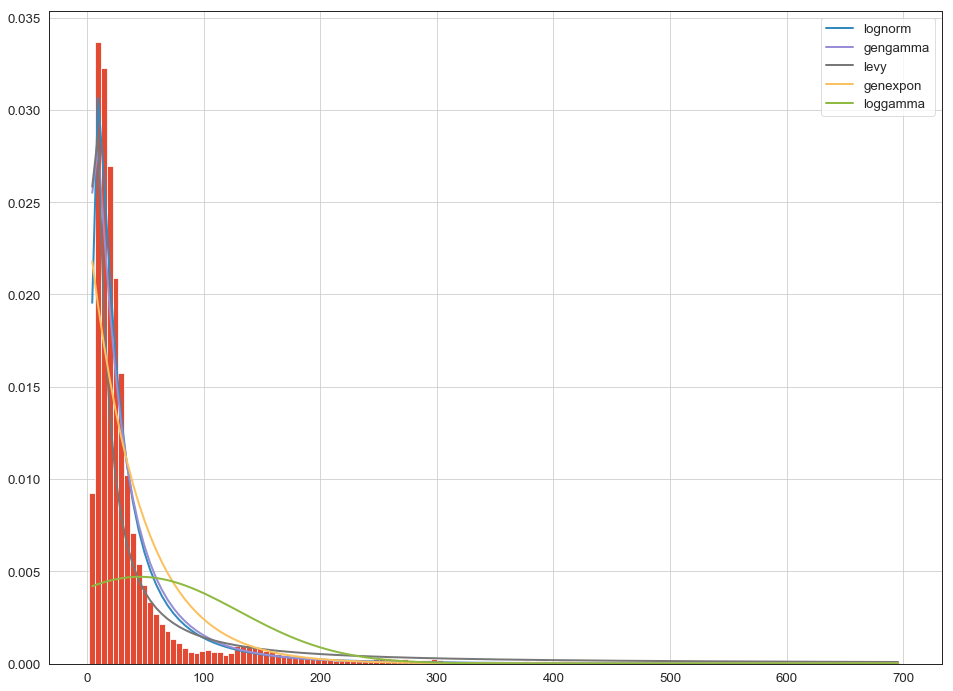

In [25]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,2760.007526,-1.117718e+06,0.069469,0.000328
pearson3,3008.004106,-1.048188e+06,0.261849,0.001070
logistic,4451.924781,-1.017120e+06,0.464976,0.001815
powerlaw,2001.002828,-1.002588e+06,0.844912,0.002324
pareto,2366.306649,-9.660322e+05,0.646681,0.004326


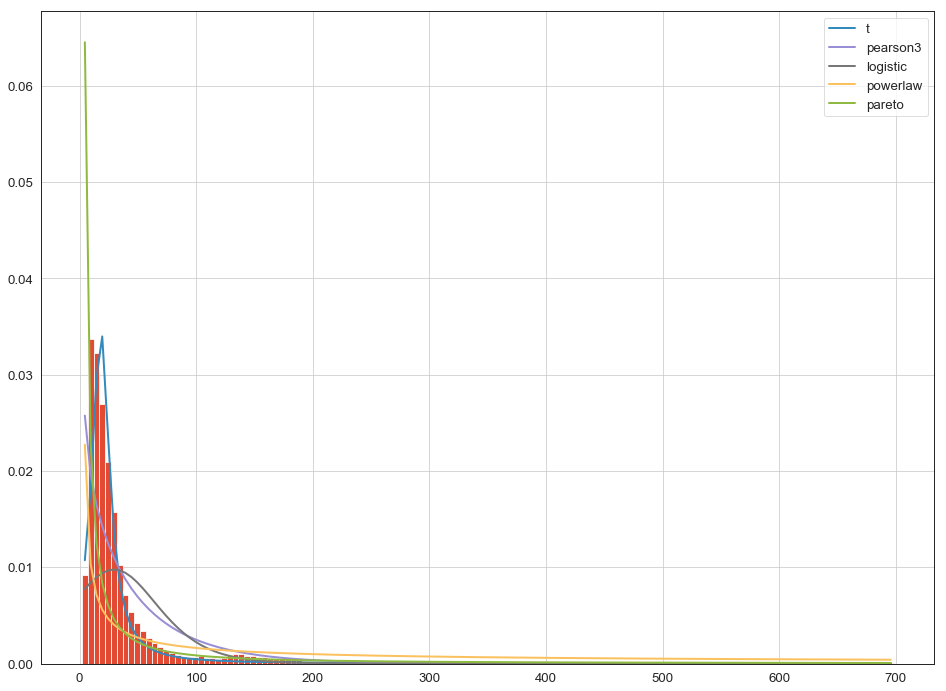

In [26]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 140)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
alpha,2525.810440,-1.237373e+06,0.018739,0.000043
burr,2559.509062,-1.229615e+06,0.023574,0.000049
f,2564.851018,-1.224650e+06,0.025748,0.000053
lognorm,2714.978571,-1.136891e+06,0.078449,0.000237
expon,3307.347079,-1.058268e+06,0.245924,0.000902


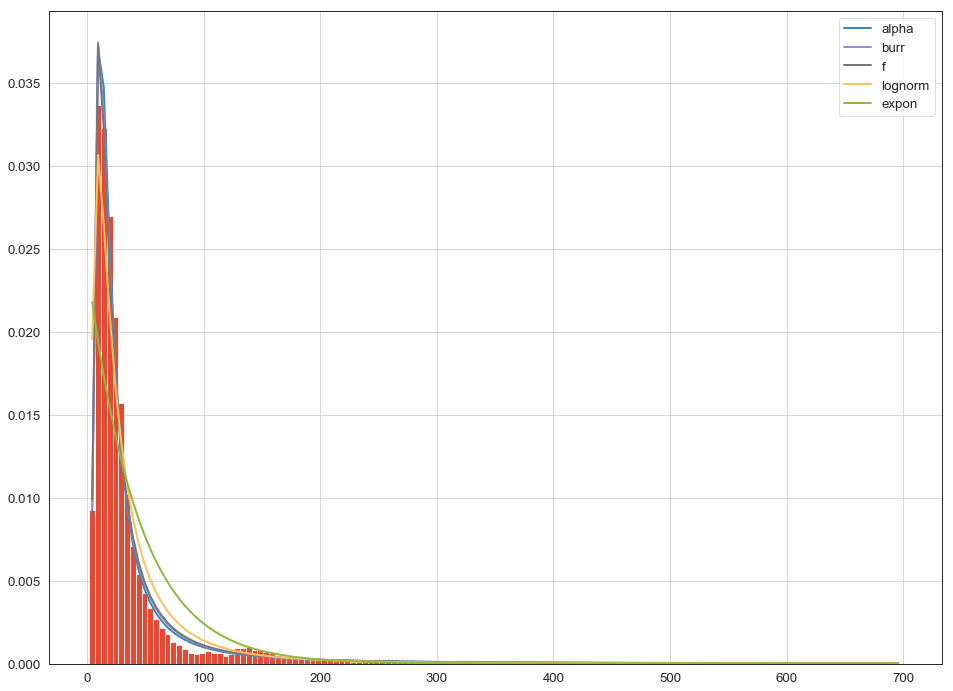

In [28]:
f = Fitter(rides,
           distributions= ['alpha','burr','expon', 'f', 'lognorm'], bins = 140)
f.fit()
f.summary()